<a href="https://colab.research.google.com/github/Sharath-Kumar-KA/HeartDisease-prediction-ML/blob/main/heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart_disease_classification

## Import required tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
heart=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart-DIsease-classification/heart-disease.csv")


In [2]:
heart.info()# 303 rows 14 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.isna().sum()# checking for missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
heart["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0.5, 0, '0 = No Disease, 1 = Disese')

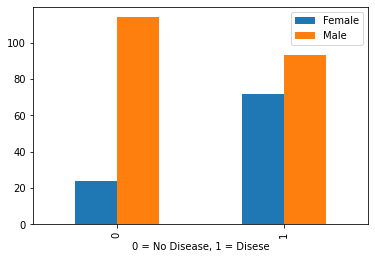

In [6]:
# comparing target with the sex
pd.crosstab(heart.target, heart.sex).plot(kind="bar")
plt.legend(["Female", "Male"])
plt.xlabel("0 = No Disease, 1 = Disese")

In [7]:
heart["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

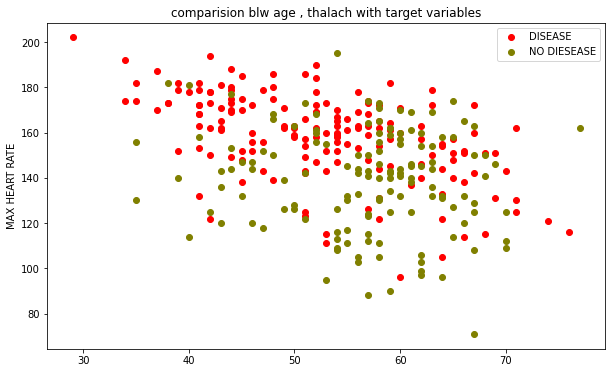

In [8]:
 plt.figure(figsize=(10,6))
 plt.scatter(heart.age[heart.target == 1],
             heart.thalach[heart.target == 1],
             c="red")
  
plt.scatter(heart.age[heart.target == 0],
            heart.thalach[heart.target == 0],
            c='olive')

plt.title("comparision blw age , thalach with target variables")
plt.ylabel("MAX HEART RATE")
plt.legend(["DISEASE","NO DIESEASE"]);

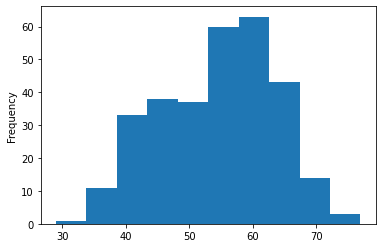

In [9]:
# checking the distribution of age
heart.age.plot.hist()

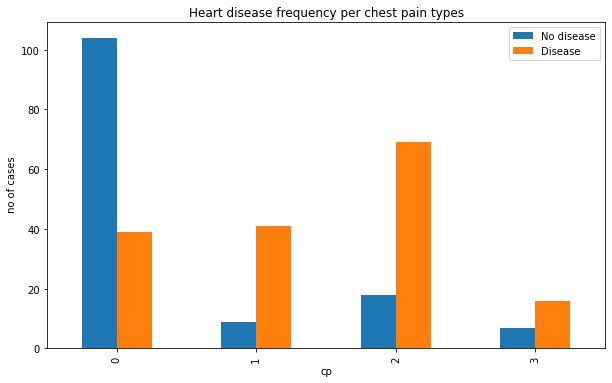

In [10]:
pd.crosstab(heart.cp, heart.target)
pd.crosstab(heart.cp, heart.target).plot(kind="bar",
                                         figsize=(10,6))
plt.title("Heart disease frequency per chest pain types")
plt.ylabel(" no of cases");
plt.legend(["No disease","Disease"]);

In [11]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
# Corelation matrix
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


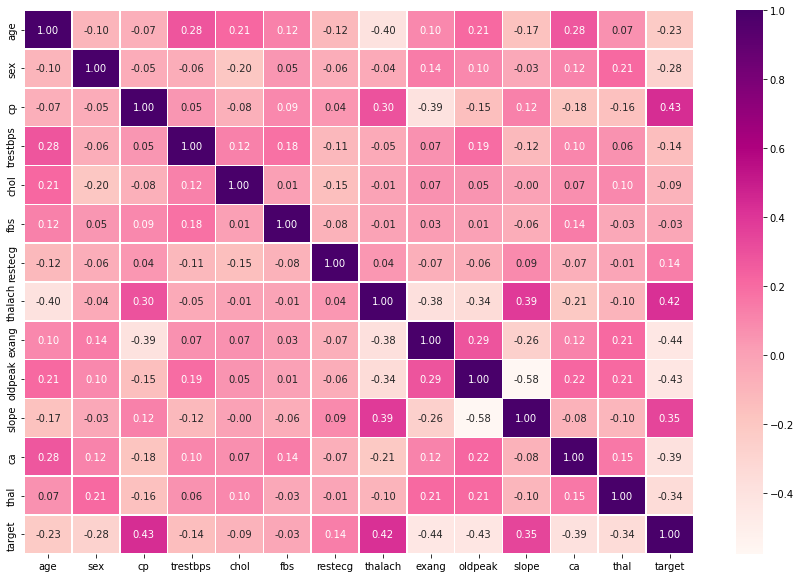

In [13]:
corr_matrix=heart.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt =".2f",
                 cmap = "RdPu");

##Modelling

In [14]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
X = heart.drop("target", axis=1)

y = heart["target"]

In [16]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [18]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.2)

In [19]:
len(X_train) == len(y_train)


True

## Trying **Logistic Regression**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
models ={"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}

# creating a function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  Fits and evaluates given learning models.
  """
  np.random.seed(42)
  # create dictionary to keep model scores
  model_scores={}

  for name, model in models.items():
    model.fit(X_train, y_train)# fit the model
    model_scores[name] = model.score(X_test,y_test)
  return model_scores

In [22]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

In [23]:
model_scores["Logistic Regression"]

0.8852459016393442

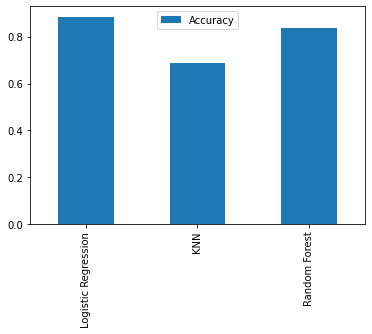

In [24]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar();

* Hyperparameter Tuning
* feature Importance
* Confusion matrix
* cross-validation
* Presicion
* Recall
* F1 score
* Classification report
* Roc curve
* Area under the curve

Hyperparameter tuning ways...
* by hand
* RandomizedSearchCV
* GridSearchCV

##Hyperparameter tuning
for KNN

In [25]:
train_scores = []
test_scores = []

# Create a list of different values ( for n neighbours-> parameter) 
neighbours = range(1,21)

knn = KNeighborsClassifier()

for i in neighbours:
  knn.set_params(n_neighbors=i)

  knn.fit(X_train,y_train)

  train_scores.append(knn.score(X_train, y_train))

  test_scores.append(knn.score(X_test, y_test))





In [26]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [27]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data:75.41%


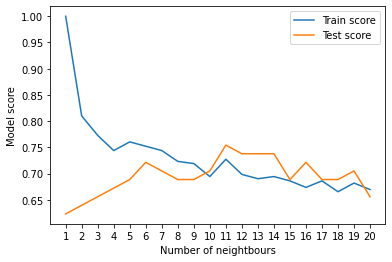

In [28]:
plt.plot(neighbours, train_scores, label="Train score")
plt.plot(neighbours, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neightbours")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

##Hyperparameter tuning with RandomisedSearchCV
* Logistic Regression
* RandomForest classifier

In [29]:
# Create a hyperparameter grid for logisticRegression
log_reg_grid = {"C":np.logspace(-4, 4, 20),
                "solver":["liblinear"]}

#Create a hyperparameter gird for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None, 3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

In [30]:
# The hyperparameter grid is setup for each model..
# let's tune them using RandomizedSearchCV

## For logistic regression

In [31]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

#Fit the random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [32]:
rs_log_reg.best_params_ # which the best parameters?

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [33]:
# lets fit on test data
rs_log_reg.score(X_test,y_test)

0.8852459016393442

## For RandomForestClassifier

In [34]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv =5,
                           n_iter=20,
                           verbose = True)

rs_rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [35]:
rs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 19,
 'min_samples_split': 4,
 'n_estimators': 210}

In [36]:
rs_rf.score(X_test,y_test)# evaluating

0.8688524590163934

##Hyperparameter tuning with GridSearchCV
* Logistic Regression
* RandomForest classifier

## For logistic regression

In [37]:
from sklearn.model_selection import GridSearchCV
# diff hyperparameters for logisticRegression
log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)# no iter..as Gridsearch rties every combination 

gs_log_reg.fit(X_train,y_train)                          

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [38]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [39]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Trying other evluation metrics
* ROC(TP v/s FP) and AUC score
* Confusion matrix
* Precision
* Recall
* F1-score

In [40]:
y_preds = gs_log_reg.predict(X_test)

In [41]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [42]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [43]:
y_preds == y_test

179     True
228    False
111     True
246     True
60      True
       ...  
249     True
104     True
300     True
193     True
184     True
Name: target, Length: 61, dtype: bool

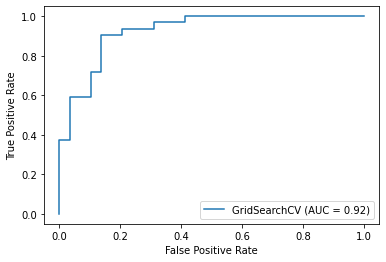

In [44]:
from sklearn.metrics import plot_roc_curve 
# plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [45]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


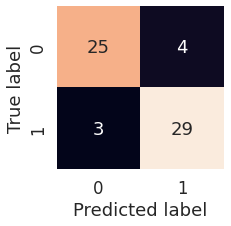

In [46]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_preds):
  fig,ax=plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
  plt.xlabel("Predicted label")
  plt.ylabel("True label")

plot_conf_mat(y_test,y_preds)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [48]:
#calculate Evaluation metrics using crossvalidation

# the best params
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [49]:
# creating a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [50]:
# cross-validated accuracy
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [51]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [52]:
# cross-validated precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [53]:
# cross-validated recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall= np.mean(cv_recall)
cv_recall

0.9212121212121213

In [54]:
# cross-validated f1-score
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

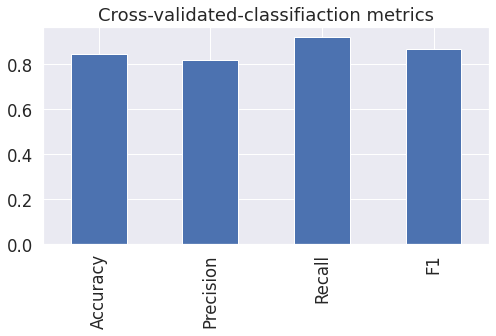

In [55]:
# lest visualize
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1":cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated-classifiaction metrics",
                    figsize=(8,4),
                    legend=False);

##Feature Importance( which feature contribute the most)

In [56]:
gs_log_reg.best_params_
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

clf.fit(X_train,y_train);

In [57]:
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [58]:
feature_dict = dict(zip(heart.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'ca': -0.6373332766360461,
 'chol': -0.0016649614843449207,
 'cp': 0.660014324982524,
 'exang': -0.604701713592625,
 'fbs': 0.040172360271308105,
 'oldpeak': -0.5679545646616215,
 'restecg': 0.31603405294617176,
 'sex': -0.8606204883695241,
 'slope': 0.4508539209693025,
 'thal': -0.6755509369619848,
 'thalach': 0.02458922341328129,
 'trestbps': -0.01155970600550047}

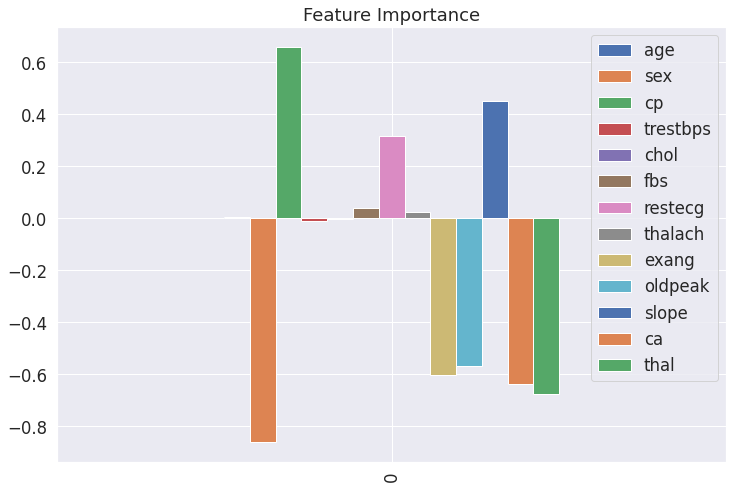

In [59]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.plot.bar(title="Feature Importance",legend=True, figsize=(12,8 ))

In [60]:
pd.crosstab(heart["sex"],heart["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [61]:
report={"ACCURACY":cv_acc*100,
        "PRECISION":cv_precision,
        "RECALL":cv_recall,
        "F1-SCORE":cv_f1}

In [62]:
report

{'ACCURACY': 84.46994535519124,
 'F1-SCORE': 0.8673007976269721,
 'PRECISION': 0.8207936507936507,
 'RECALL': 0.9212121212121213}

## For RandomForestclassifier

In [63]:
#Create a hyperparameter gird for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None, 3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

In [ ]:
gs_rf_cl=GridSearchCV(RandomForestClassifier(),
                      param_grid= rf_grid,
                      cv=5,
                      verbose=True)
gs_rf_cl.fit(X_train,y_train)

In [ ]:
gs_rf_cl.best_params_

In [ ]:
gs_rf_cl.score(X_test,y_test)